# Loan Prediction

**Hypothesis Generation**
* Applicants with high income should have more chances of loan approval
* Applicants who have repaid their previous debts should have higher chances of loan approval
* Loan Approval should also depend on the loan amount, if the loan amount is less then chances of loan approval must be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Let's make copy of dataset so that if we need to make changes to these datasets we would not lose original dataset

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

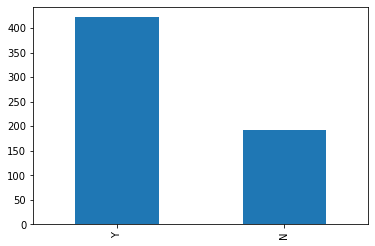

In [10]:
train['Loan_Status'].value_counts().plot.bar()

### Univariate Analysis 

#### Visualizing Independent Categorical Variable 

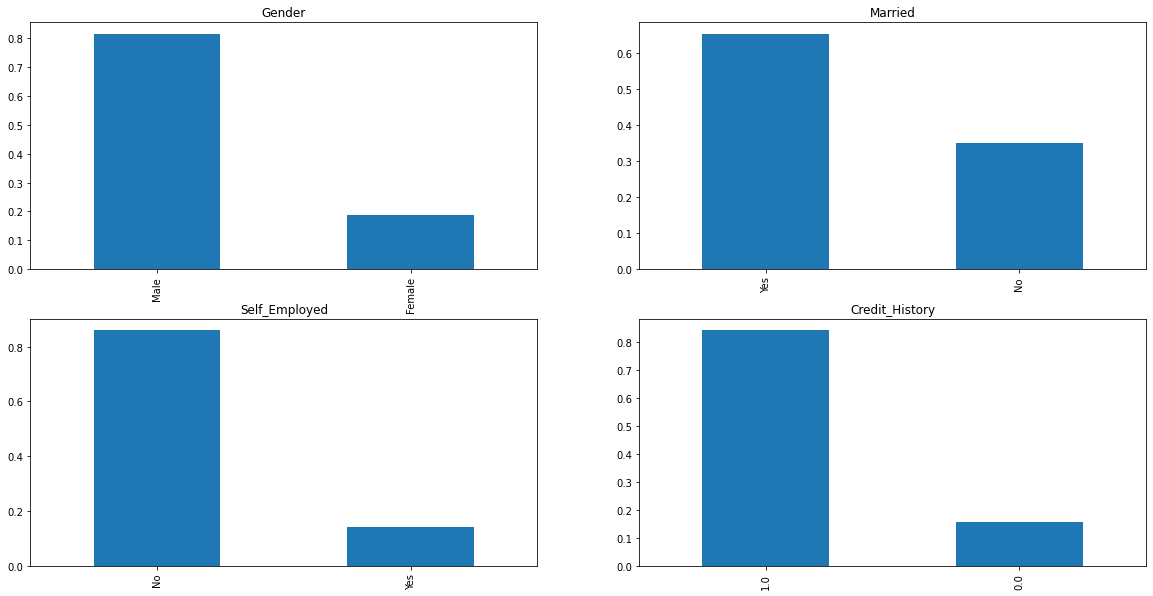

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

It can be inferred from the above bar plots that:
* 80% Applicants in the dataset are male
* Around 65% Applicants are married
* Around 15% in the dataset are self employed
* Around 85% Applicants have repaid the debt

#### Visualizing Independent Ordinal Variable 

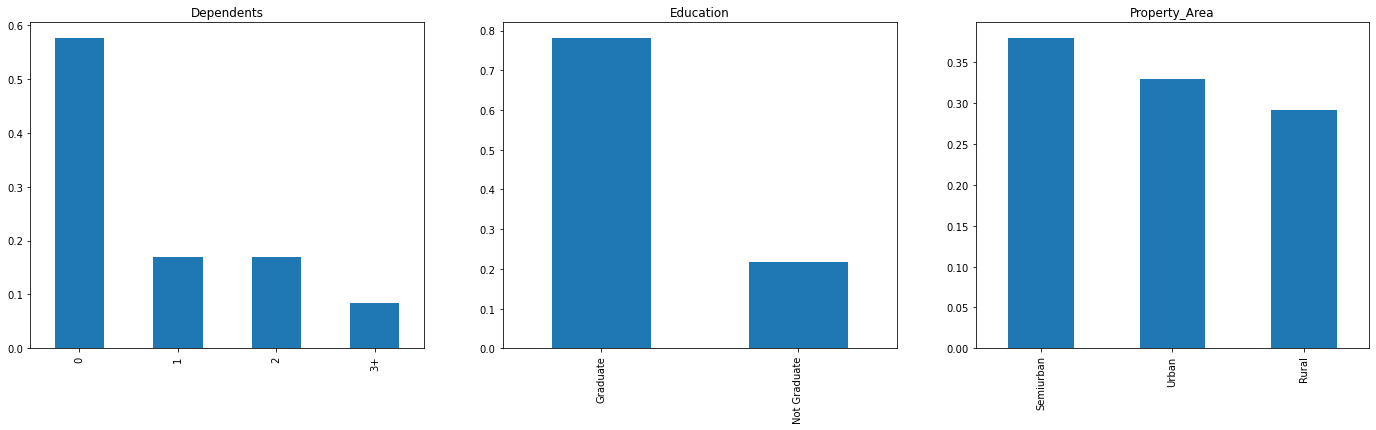

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

It can be inferred from the above bar plots that:
* Most of the Applicants don't have any dependents
* Around 80% of the Applicants are Graduate
* Most of the people are from Semiurban Area

#### Visualizing Independent Numerical Variable

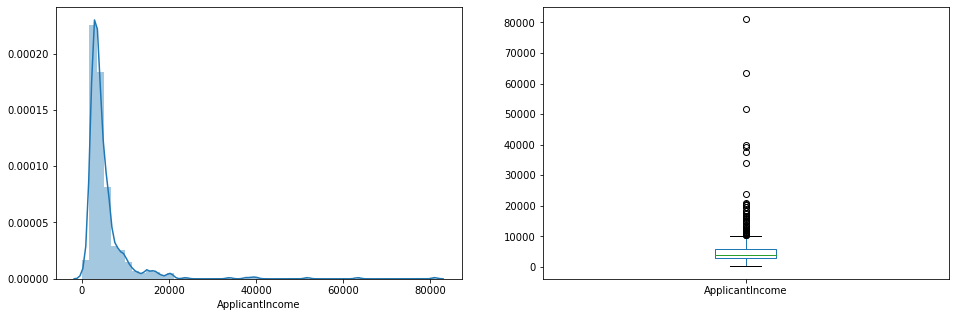

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the  distribution of applicant income is towards left which means it is not normalised. We'll try to normalise as algorithms work better if the data is normalised.

The boxplot confirms the presence of outliers. This can be attributed to income disparity in society. Part of this can be driven by the fact that we are looking at people with different education levels. Let's segregate them by Education levels:

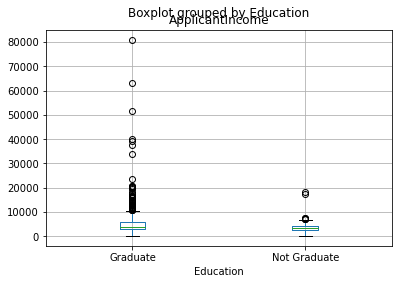

In [19]:
train.boxplot(column='ApplicantIncome', by='Education')

We can see that there are a higher number of graduates with very high income, which are outliers.

Let's look at coapplicant income distribution.

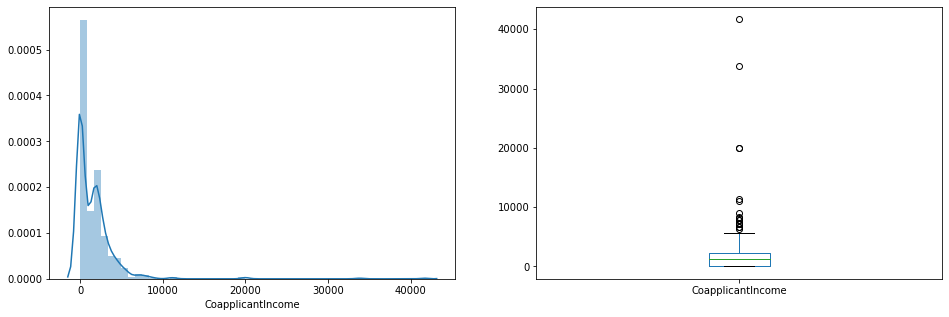

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of applicant income. Majority of coapplicant's income ranges from 0 to 5000. We also see a lot of outliers and it not normally distributed.

Let's look at distribution of LoanAmount variable

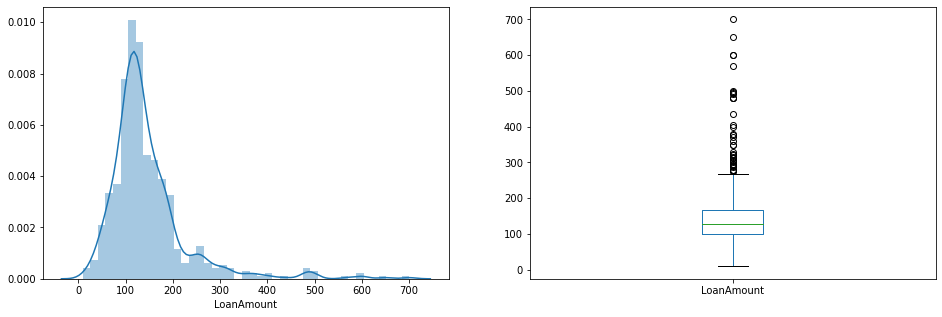

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers and it is fairly normally distributed.

### Bivariate Analysis 

#### Categorical Independent Variable VS Target Variable 

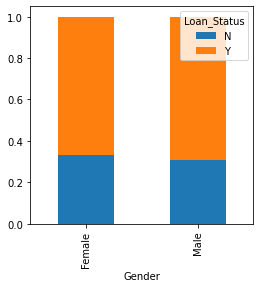

In [25]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female is more or less is same for both approved and unapproved loans

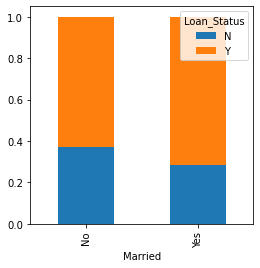

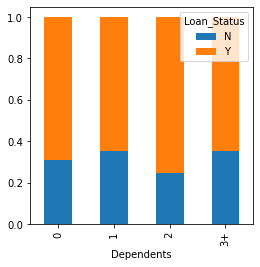

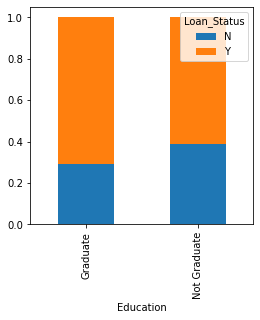

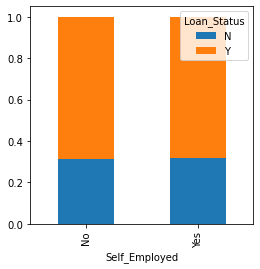

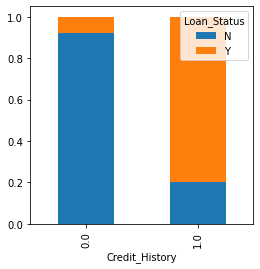

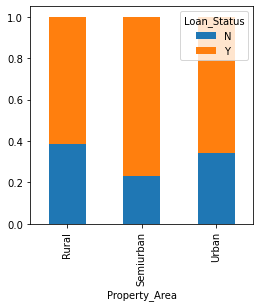

In [28]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

We can infer the followinf points w.r.t to above graphs:
* Proportion of married applicants is higher for approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar accross both the categories of Loan Status.
* There is nothing significant that we can infer from the self_employed vs Loan_Status graph.
* It seems that people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans approved in Semiurban areas are higher than compared to urban or rural areas.

#### Numerical Independent Variable VS Target Variable

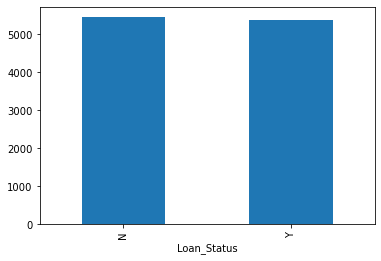

In [29]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don't see any change in mean income. So let's make bins for the applicant income variable based on the values in itand analyze the corresponding loan status for each bin.

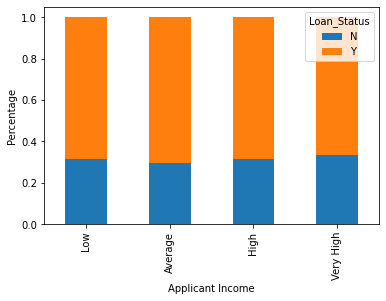

In [31]:
bins=[0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Applicant Income')
P = plt.ylabel('Percentage')
plt.show()

It can be inferred that the the income does not effect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high then the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount in similar manner.

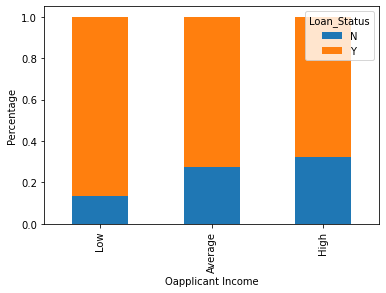

In [32]:
bins=[0, 1000, 3000, 41000]
group = ['Low', 'Average', 'High']
train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train['CoapplicantIncome_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Oapplicant Income')
P = plt.ylabel('Percentage')
plt.show()

It shows that if the coapplicant's income is low then the chances of loan approval is high. But this does not look right. The possible reason could be that most of the applicant don't have any coapplicant so the coapplicant income for such applicant is 0 and hence the loan approval does not depend on it. So we can make new variable combining applicant's income and coapplicant's income to visualize the combined effect of income on loan approval.

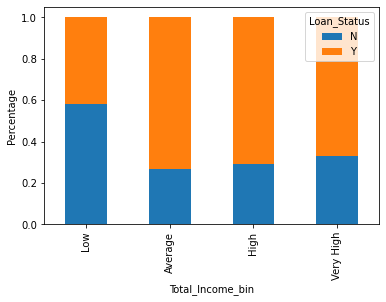

In [36]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income_bin')
P = plt.ylabel('Percentage')
plt.show()

We can see that the proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants having Average, High and very high Income.

Let's visualize the Laon amount variable.

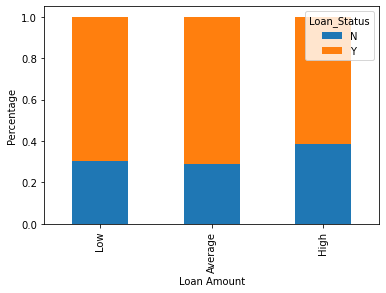

In [37]:
bins=[0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')
plt.show()

It can be seen that proportion of loans approved is higher for low and average loan amounts as compared to higher loan amounts which supports our hypothesis.

We will change the 3+ in dependent variable to 3 to make it a numerical variable. We will also convert the target variable categories to 0 and 1 so that we can find its correlationwith numerical variables. We will replace N with 0 and Y with 1.

In [42]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [43]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

Now let's see the correlation between all the numerical variables using Heat Map.

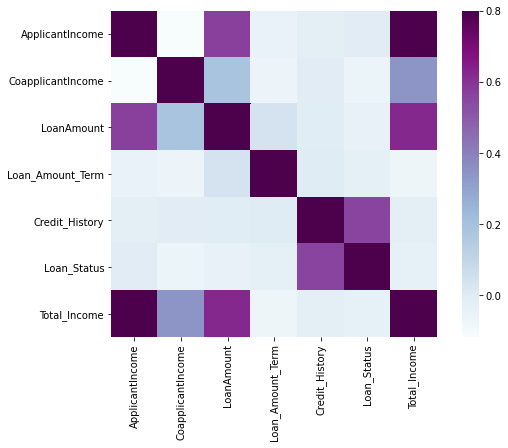

In [44]:
matrix=train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8,square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LaonAmount) and (Credit_History - LoanStatus). LoanAmount and CoapplicantIncome are also correlated.

### Missing Value Imputation

In [45]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

We can use these methods to fill the missing values:
* **For Numerical Variables:** imputation using mean or median
* **For Categorical Variables:** imputation using mode

In [47]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [48]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [49]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will fill missing values of LoanAmount variable. As this is a numerical variable we can use mean or median but as before we have seen that it have outliers then in this case median would be better choice.

In [50]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [51]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [52]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

### Outlier Treatment 

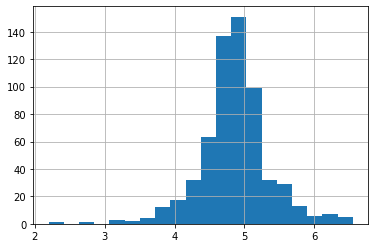

In [53]:
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
test['LoanAmount_Log'] = np.log(test['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)

### Model Building 

In [54]:
train.drop('Loan_ID',axis=1)
test.drop('Loan_ID',axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [55]:
X = train.drop('Loan_Status', axis=1)
Y = train.Loan_Status

In [56]:
# Creating dummy variables for categorical variables
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [58]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [61]:
pred_cv = model.predict(x_cv)

In [62]:
accuracy_score(y_cv, pred_cv)

0.7513513513513513